In [15]:
from textblob import TextBlob
import pandas as pd
%matplotlib inline

import sys   
reload(sys)
sys.setdefaultencoding('utf-8')   

In [16]:
# use the textblob module to make a function called stringToSentiment
# that returns a sentences sentiment
def stringToSentiment(text):
    return TextBlob(text).sentiment.polarity

In [17]:
stringToSentiment('i hate you')

-0.8

In [18]:
stringToSentiment('i love you')

0.5

In [19]:
stringToSentiment('i see you')

0.0

In [20]:
# read in tweets data into a dataframe
# these tweets are from last May and are about Apple (AAPL)
tweets = pd.read_csv('C:/Users/admin/Documents/GitHub/python-ds-book/data/so_many_tweets.csv')
tweets.head()

,Text,Date,Status,Retweet
0,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17
1,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN
2,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN
3,RT @WWalkerWW: iOS 9 vs. Android M – The New F...,2015-05-24 04:08:34,602325288740114432,6.023104e+17
4,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17


In [21]:
tweets.shape

(52512, 4)

In [22]:
# create a new column in tweets called sentiment that maps 
# stringToSentiment to the text column
tweets['sentiment'] = tweets['Text'].apply(stringToSentiment)
tweets.head()

,Text,Date,Status,Retweet,sentiment
0,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17,0.500000
1,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN,0.136364
2,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN,0.500000
3,RT @WWalkerWW: iOS 9 vs. Android M – The New F...,2015-05-24 04:08:34,602325288740114432,6.023104e+17,0.136364
4,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17,0.000000


In [23]:
tweets.index

RangeIndex(start=0, stop=52512, step=1)

In [24]:
# As a list, we can splice it
list(tweets.index)[:5]

[0, 1, 2, 3, 4]

In [25]:
# cast the date column as a datetime
tweets['Date'] = pd.to_datetime(tweets.Date)
tweets['Date'].head()

0   2015-05-24 03:46:08
1   2015-05-24 04:17:42
2   2015-05-24 04:13:22
3   2015-05-24 04:08:34
4   2015-05-24 04:04:42
Name: Date, dtype: datetime64[ns]

In [26]:
tweets.index = tweets.Date
tweets.index

DatetimeIndex(['2015-05-24 03:46:08', '2015-05-24 04:17:42',
               '2015-05-24 04:13:22', '2015-05-24 04:08:34',
               '2015-05-24 04:04:42', '2015-05-24 04:00:01',
               '2015-05-24 03:54:07', '2015-05-24 04:25:29',
               '2015-05-24 04:24:47', '2015-05-24 04:06:42',
               ...
               '2015-05-02 16:30:02', '2015-05-02 16:29:35',
               '2015-05-02 16:28:26', '2015-05-02 16:27:53',
               '2015-05-02 16:27:02', '2015-05-02 16:26:39',
               '2015-05-02 16:25:00', '2015-05-02 16:23:39',
               '2015-05-02 16:23:38', '2015-05-02 16:23:21'],
              dtype='datetime64[ns]', name=u'Date', length=52512, freq=None)

In [27]:
tweets.head()

,Text,Date,Status,Retweet,sentiment
Date,,,,,
2015-05-24 03:46:08,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17,0.500000
2015-05-24 04:17:42,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN,0.136364
2015-05-24 04:13:22,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN,0.500000
2015-05-24 04:08:34,RT @WWalkerWW: iOS 9 vs. Android M – The New F...,2015-05-24 04:08:34,602325288740114432,6.023104e+17,0.136364
2015-05-24 04:04:42,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17,0.000000


In [28]:
# create a dataframe called daily_tweets which resamples tweets by D,
# averaging the columns
daily_tweets = tweets[['sentiment']].resample('D', how='mean')

# I only want the sentiment column in my new Dataframe.
daily_tweets.head()

,sentiment
Date,
2015-05-02,0.083031
2015-05-03,0.107045
2015-05-04,0.084062
2015-05-05,0.063895
2015-05-06,0.067004


In [29]:
daily_tweets.shape

(23, 1)

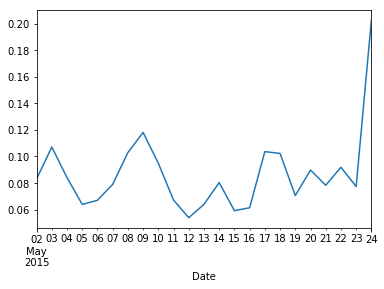

In [30]:
# plot the sentiment as a line graph
daily_tweets.sentiment.plot(kind='line')

In [31]:
# get historical prices through the Yahoo Finance API from yahoo_finance import Share
yahoo = Share("AAPL")
historical_prices = yahoo.get_historical('2015-05-2', '2015-05-25')
prices = pd.DataFrame(historical_prices)

prices.head()

NameError: name 'Share' is not defined

In [ ]:
# Set the index of the price dataframe to also be datetimes
prices.index = pd.to_datetime(prices['Date'])
prices.info() #the columns aren't numbers!

In [ ]:
# cast the column as numbers
prices.Close = not_null_close.Close.astype('float')
prices.Volume = not_null_close.Volume.astype('float')

In [ ]:
# plot both volume and close as line graphs in the same graph, what do
you notice is the problem?
prices[["Volume", 'Close']].plot()

In [ ]:
prices[["Volume", 'Close']].describe()

In [ ]:
# scale the columns by z scores using StandardScaler
# Then plot the scaled data
s = StandardScaler()
only_prices_and_volumes = prices[["Volume", 'Close']]
price_volume_scaled = s.fit_transform(only_prices_and_volumes)
pd.DataFrame(price_volume_scaled, columns=["Volume", 'Close']).plot()

In [ ]:
# concatinate prices.Close, and daily_tweets.sentiment
merged = pd.concat([prices.Close, daily_tweets.sentiment], axis=1)
merged.head()

In [ ]:
# Delete any rows with missing values in any column
merged.dropna(inplace=True)

In [ ]:
merged.plot()
# wow that looks awful

In [ ]:
# scale the columns by z scores using StandardScaler
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
merged_scaled = s.fit_transform(merged)
pd.DataFrame(merged_scaled, columns=merged.columns).plot()
# notice how sentiment seems to follow the closing price

In [ ]:
# Shift the sentiment column backwards one item
merged['yesterday_sentiment'] = merged['sentiment'].shift(1)
merged.head()

In [ ]:
# Make a new dataframe for our regression and drop the null values
regression_df = merged[['yesterday_sentiment', 'Close']]
regression_df.dropna(inplace=True)
regression_df.head()

In [ ]:
# Imports for our regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
import numpy as np

In [ ]:
# Our RMSE as a result of cross validation linear regression
linreg = LinearRegression()
rmse_cv = np.sqrt(abs(cross_val_score(linreg, regression_
df[['yesterday_sentiment']], regression_df['Close'], cv=3,
scoring='mean_squared_error').mean()))
rmse_cv

In [ ]:
# Our RMSE as a result of cross validation random forest
rf = RandomForestRegressor()
rmse_cv = np.sqrt(abs(cross_val_score(rf, regression_df[['yesterday_
sentiment']], regression_df['Close'], cv=3, scoring='mean_squared_
error').mean()))
rmse_cv

In [ ]:
regression_df['Close'].describe()

In [ ]:
# null model for regression
mean_close = regression_df['Close'].mean()
preds = [mean_close]*regression_df.shape[0]
preds
from sklearn.metrics import mean_squared_error
null_rmse = np.sqrt(mean_squared_error(preds, regression_df['Close']))
null_rmse

In [ ]:
# Imports for our classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
import numpy as np

# Make a new dataframe for our classification and drop the null values
classification_df = merged[['yesterday_sentiment', 'Close']]
# variable to represent yesterday's closing price
classification_df['yesterday_close'] = classification_df['Close'].
shift(1)
# column that represents the precent change in price since yesterday
classification_df['percent_change_in_price'] = (classification_
df['Close']-classification_df['yesterday_close']) / classification_
df['yesterday_close']
# drop any null values
classification_df.dropna(inplace=True)
classification_df.head()
# Our new classification response
classification_df['change_close_big_deal'] = abs(classification_
df['percent_change_in_price'] ) > .01
classification_df.head()

In [ ]:
# Our accuracy as a result of cross validation random forest
rf = RandomForestClassifier()
accuracy_cv = cross_val_score(rf, classification_df[['yesterday_
sentiment']], classification_df['change_close_big_deal'], cv=3,
scoring='accuracy').mean()
accuracy_cv

In [ ]:
# Our accuracy as a result of cross validation logistic regression
logreg = LogisticRegression()
accuracy_cv = cross_val_score(logreg, classification_df[['yesterday_
sentiment']], classification_df['change_close_big_deal'], cv=3,
scoring='accuracy').mean()
accuracy_cv

In [ ]:
# null model for classification
null_accuracy = 1 - classification_df['change_close_big_deal'].mean()
null_accuracy